# City Development Index

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Importing

In [3]:
df = pd.read_csv('C:/Users/Ferid/Desktop/City Development Index.csv')
df.head()

,No.,City,Country,Region,CDI,City Product,Infrastructure,Waste,Health,Education,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,Abidjan,C?te d'Ivoire,Africa,39.7,56.6,21.7,29.0,94.6,42.4,NaN,NaN,NaN,NaN,NaN
1,2,Accra,Ghana,Africa,46.6,49.4,50.0,0.0,94.0,62.0,NaN,NaN,NaN,NaN,NaN
2,3,Antananarivo,Madagascar,Africa,34.5,44.4,22.5,0.0,92.7,52.5,NaN,NaN,NaN,NaN,NaN
3,4,Bangui,Central African Republic,Africa,27.5,42.0,14.9,0.1,90.2,36.8,NaN,NaN,NaN,NaN,NaN
4,5,Banjul,Gambia,Africa,40.5,46.0,16.0,48.0,87.8,37.8,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             161 non-null    int64  
 1   City            161 non-null    object 
 2   Country         161 non-null    object 
 3   Region          161 non-null    object 
 4   CDI             161 non-null    float64
 5   City Product    161 non-null    float64
 6   Infrastructure  161 non-null    float64
 7   Waste           161 non-null    float64
 8   Health          161 non-null    float64
 9   Education       161 non-null    float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
 14  Unnamed: 14     0 non-null      float64
dtypes: float64(11), int64(1), object(3)
memory usage: 19.0+ KB


In [5]:
df.dropna(axis=1, inplace=True)
df=df.iloc[:,1:]

In [6]:
df.describe()

,CDI,City Product,Infrastructure,Waste,Health,Education
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,65.025466,63.840373,68.300621,43.808075,77.164596,73.086335
std,18.089397,14.930294,24.173538,31.730202,14.829592,20.303237
min,21.700000,30.700000,4.700000,0.000000,26.400000,11.000000
25%,53.400000,51.600000,50.000000,16.000000,72.500000,62.000000
50%,68.100000,64.300000,74.800000,45.000000,81.600000,78.900000
75%,77.400000,74.200000,88.600000,65.000000,86.600000,88.200000
max,98.000000,97.200000,99.800000,100.000000,94.900000,99.800000


In [7]:
df.head()

,City,Country,Region,CDI,City Product,Infrastructure,Waste,Health,Education
0,Abidjan,C?te d'Ivoire,Africa,39.7,56.6,21.7,29.0,94.6,42.4
1,Accra,Ghana,Africa,46.6,49.4,50.0,0.0,94.0,62.0
2,Antananarivo,Madagascar,Africa,34.5,44.4,22.5,0.0,92.7,52.5
3,Bangui,Central African Republic,Africa,27.5,42.0,14.9,0.1,90.2,36.8
4,Banjul,Gambia,Africa,40.5,46.0,16.0,48.0,87.8,37.8


In [8]:
df.corr().sort_values('CDI')

,CDI,City Product,Infrastructure,Waste,Health,Education
Health,-0.074773,0.002292,-0.059351,-0.136931,1.000000,-0.000992
Education,0.814601,0.595449,0.681358,0.533084,-0.000992,1.000000
City Product,0.829836,1.000000,0.726198,0.640418,0.002292,0.595449
Waste,0.838583,0.640418,0.652588,1.000000,-0.136931,0.533084
Infrastructure,0.895006,0.726198,1.000000,0.652588,-0.059351,0.681358
CDI,1.000000,0.829836,0.895006,0.838583,-0.074773,0.814601


## Data Visualization

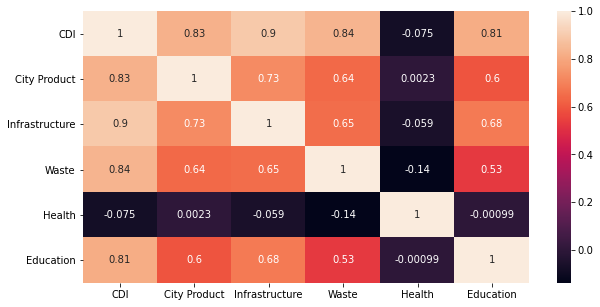

In [9]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True);

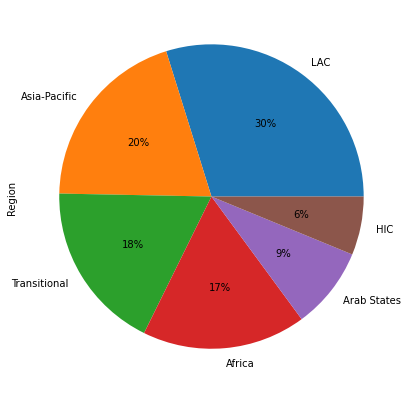

In [10]:
plt.figure(figsize=[7,7])
df.Region.value_counts().plot(kind='pie', autopct='%.f%%');

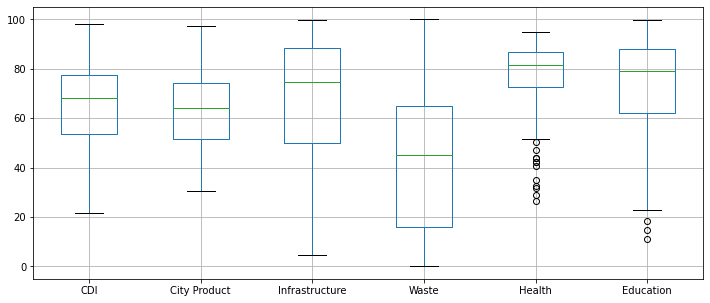

In [11]:
plt.figure(figsize=[12,5])
df.boxplot();

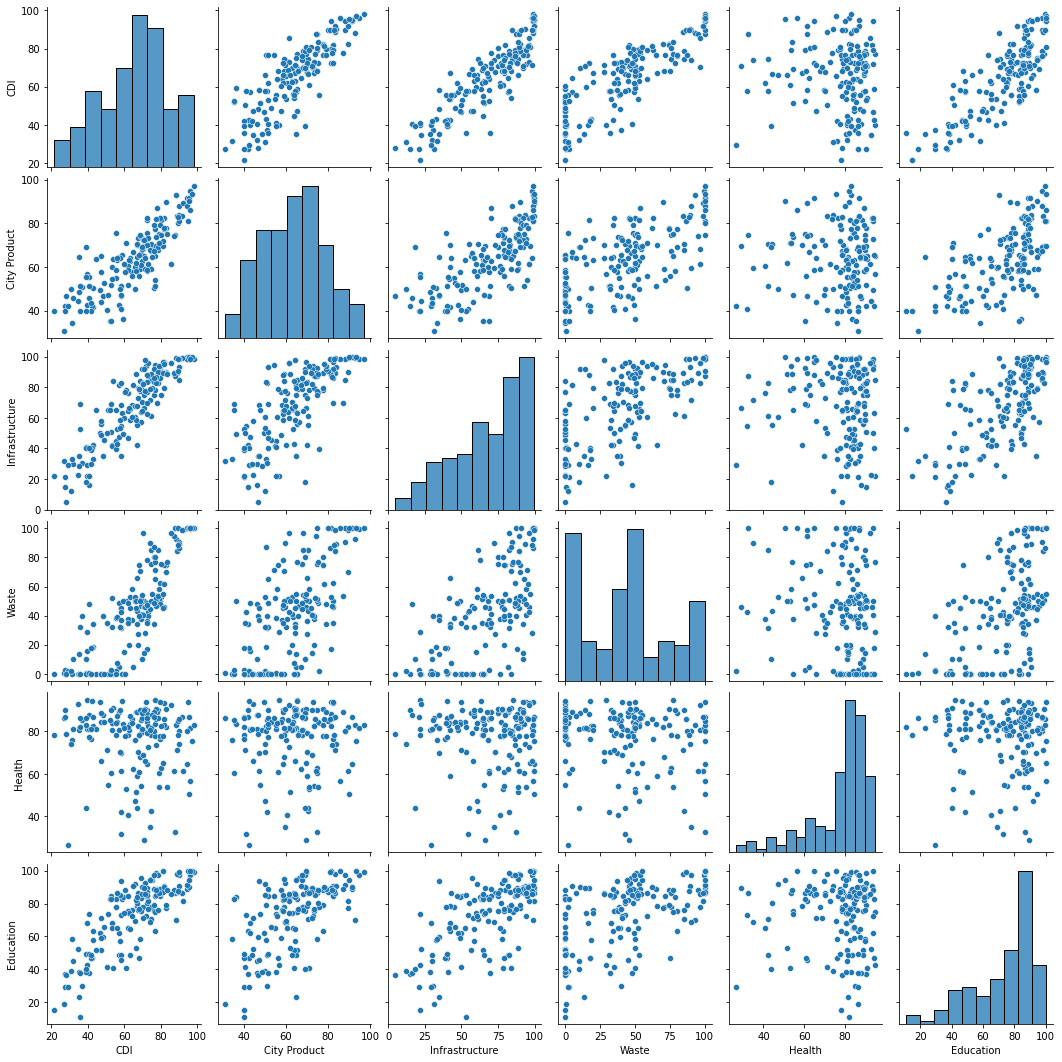

In [12]:
sns.pairplot(df);

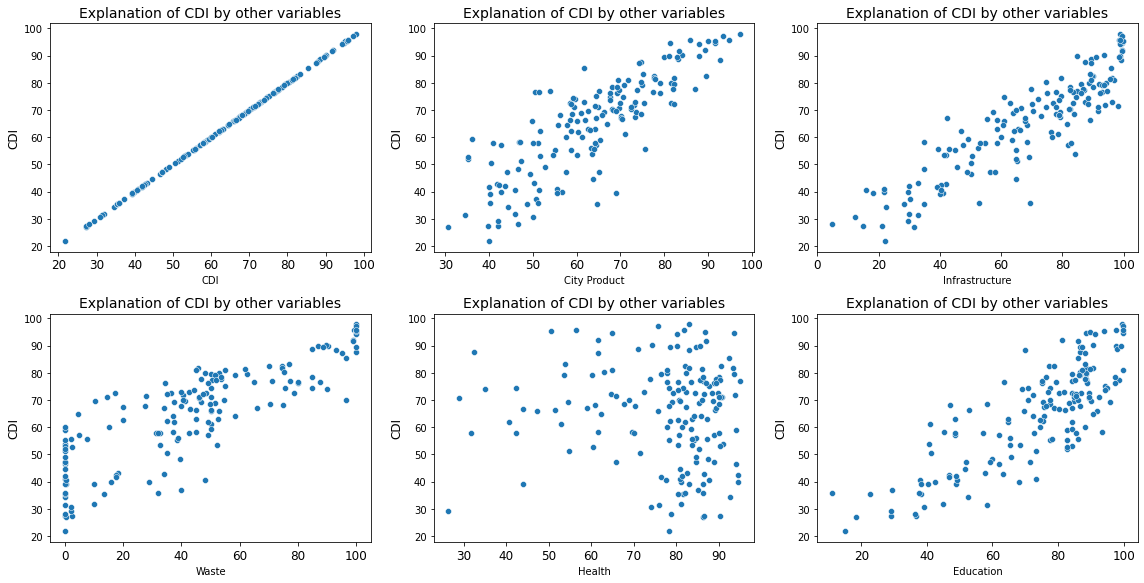

In [13]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        sns.scatterplot(x=df[i],y='CDI',data=df)
        plt.xticks(size=12)
        plt.ylabel('CDI',fontsize=12)
        plt.title('Explanation of CDI by other variables', size=14)
    pnum+=1
    plt.tight_layout()

### Values by Regions

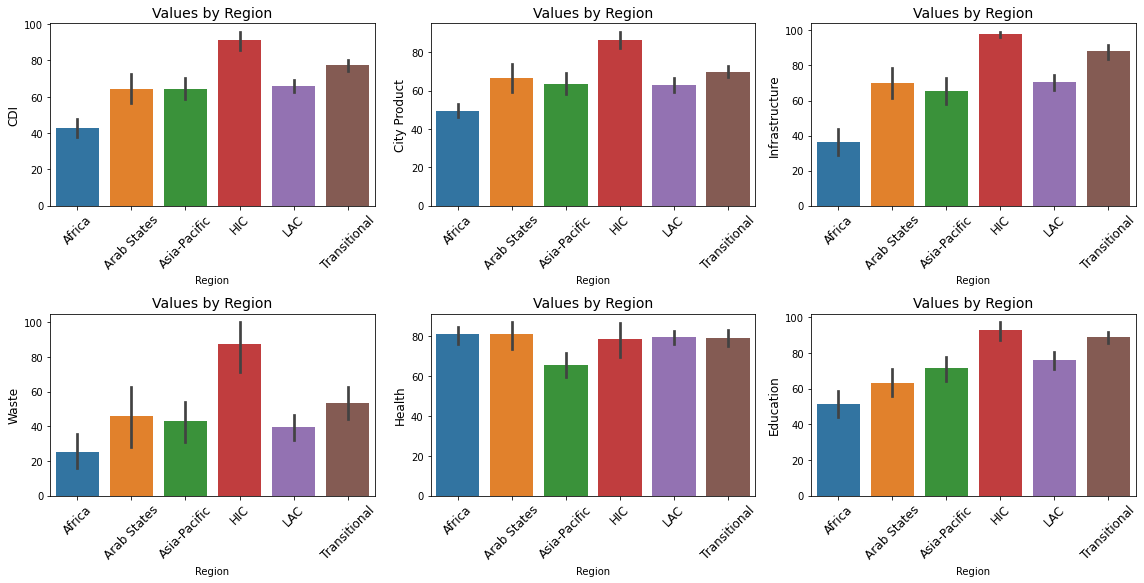

In [14]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        sns.barplot(x='Region',y=i,data=df)
        plt.xticks(rotation=45,size=12)
        plt.ylabel(i,fontsize=12)
        plt.title('Values by Region',size=14)
    pnum+=1
    plt.tight_layout()

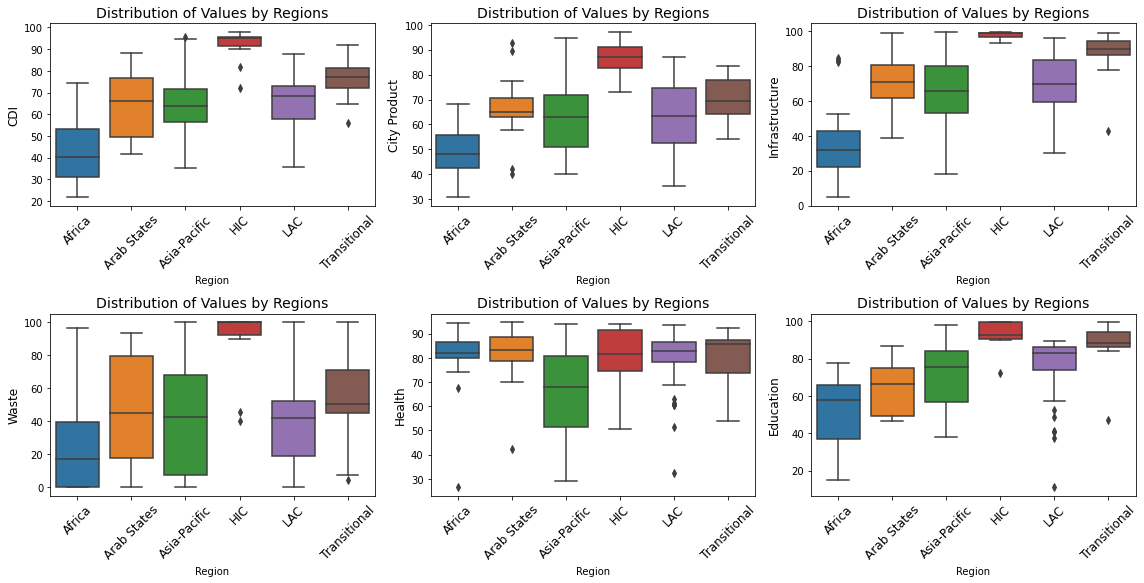

In [15]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        sns.boxplot(x='Region',y=i,data=df)
        plt.xticks(rotation=45,size=12)
        plt.ylabel(i,fontsize=12)
        plt.title('Distribution of Values by Regions' ,size=14)
    pnum+=1
    plt.tight_layout()

### Ranking of Countries

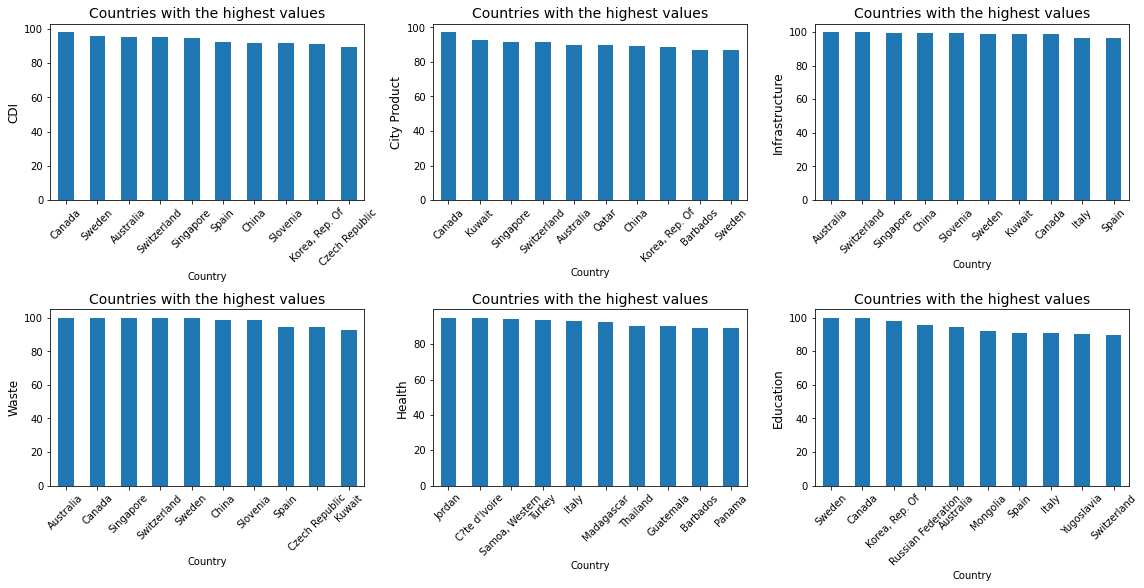

In [16]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        df.groupby('Country')[i].mean().sort_values(ascending=False)[:10].plot(kind='bar');        
        plt.xticks(rotation=45,size=10)
        plt.ylabel(i,fontsize=12)
        plt.title('Countries with the highest values' ,size=14)
    pnum+=1
    plt.tight_layout()

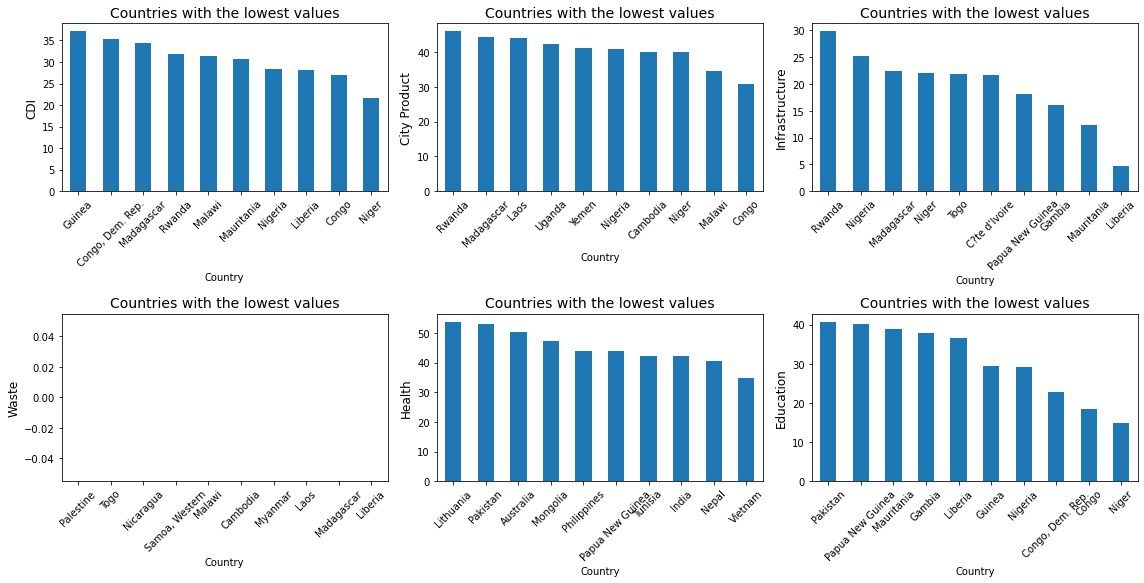

In [17]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        df.groupby('Country')[i].mean().sort_values(ascending=False)[-10:].plot(kind='bar');        
        plt.xticks(rotation=45,size=10)
        plt.ylabel(i,fontsize=12)
        plt.title('Countries with the lowest values' ,size=14)
    pnum+=1
    plt.tight_layout()

### Ranking of Cities

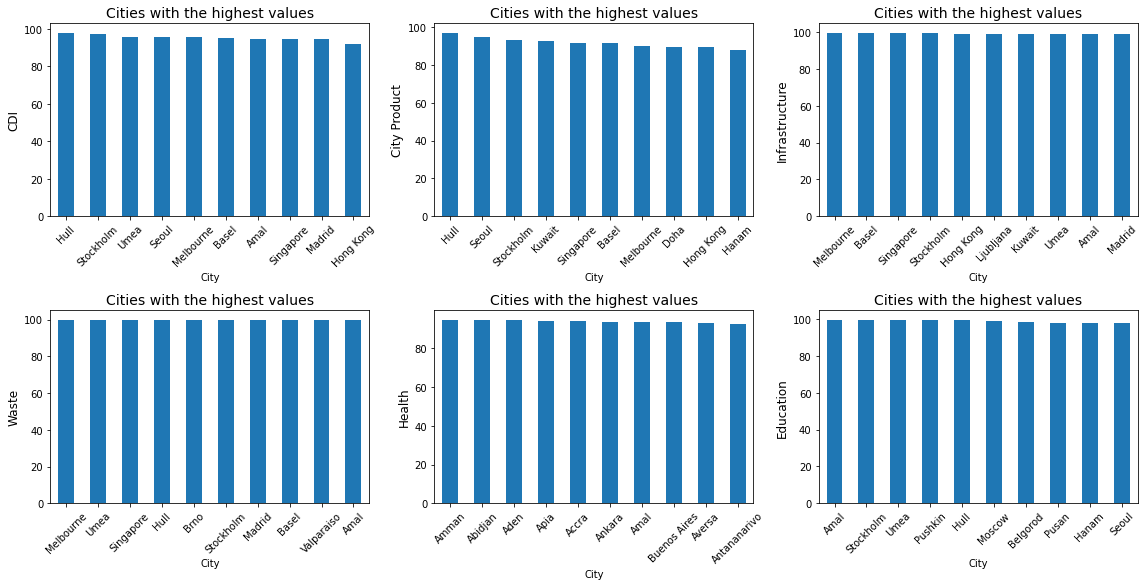

In [18]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        df.groupby('City')[i].mean().sort_values(ascending=False)[:10].plot(kind='bar');        
        plt.xticks(rotation=45,size=10)
        plt.ylabel(i,fontsize=12)
        plt.title('Cities with the highest values' ,size=14)
    pnum+=1
    plt.tight_layout()

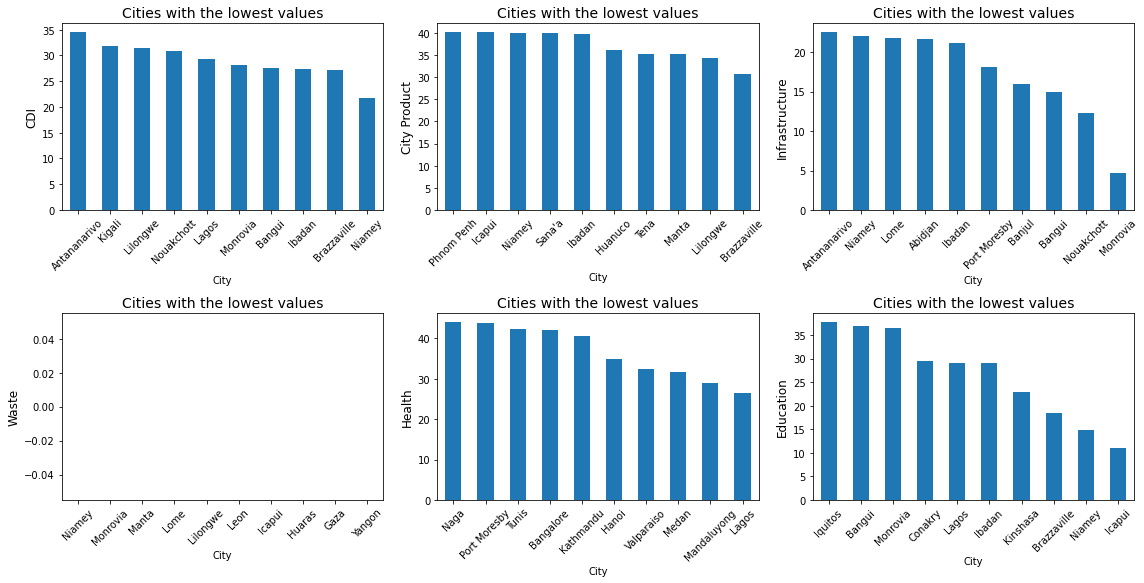

In [19]:
plt.figure(figsize=[16,12])
pnum=1
for i in df.columns:
    if pnum>=4:
        plt.subplot(3,3,pnum)
        df.groupby('City')[i].mean().sort_values(ascending=False)[-10:].plot(kind='bar');        
        plt.xticks(rotation=45,size=10)
        plt.ylabel(i,fontsize=12)
        plt.title('Cities with the lowest values' ,size=14)
    pnum+=1
    plt.tight_layout()

## Model Selection

In [20]:
df=df._get_numeric_data()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [23]:
models=[LinearRegression,
         MLPRegressor,
         DecisionTreeRegressor,
         KNeighborsRegressor,
         RandomForestRegressor,
         GradientBoostingRegressor,
         XGBRegressor,
         LGBMRegressor,
         CatBoostRegressor,
         SVR]

In [25]:
X=df.drop('CDI', axis=1)
y=df['CDI']

In [26]:
RMSE = []
ModelName = []

def ML(Algorithm):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model = Algorithm().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    ModelName.append(Algorithm.__name__)
    print(Algorithm.__name__,'RMSE score:',rmse)

In [27]:
for i in models:
    ML(i)

LinearRegression RMSE score: 2.6849829190865653
MLPRegressor RMSE score: 10.353217624680209
DecisionTreeRegressor RMSE score: 5.0894424294242935
KNeighborsRegressor RMSE score: 3.982444810247429
RandomForestRegressor RMSE score: 3.6626337890549867
GradientBoostingRegressor RMSE score: 3.321208592759584


C:\Users\Ferid\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBRegressor RMSE score: 3.6074723652252882
LGBMRegressor RMSE score: 3.8060412037320885
Learning rate set to 0.02707
0:	learn: 17.7088797	total: 157ms	remaining: 2m 36s
1:	learn: 17.4165482	total: 159ms	remaining: 1m 19s
2:	learn: 17.1025560	total: 161ms	remaining: 53.5s
3:	learn: 16.8290247	total: 163ms	remaining: 40.6s
4:	learn: 16.5533345	total: 165ms	remaining: 32.8s
5:	learn: 16.2794337	total: 167ms	remaining: 27.6s
6:	learn: 15.9837943	total: 169ms	remaining: 23.9s
7:	learn: 15.7320063	total: 171ms	remaining: 21.1s
8:	learn: 15.4599632	total: 172ms	remaining: 19s
9:	learn: 15.2090118	total: 174ms	remaining: 17.2s
10:	learn: 14.9124433	total: 176ms	remaining: 15.8s
11:	learn: 14.6541563	total: 178ms	remaining: 14.6s
12:	learn: 14.3773752	total: 179ms	remaining: 13.6s
13:	learn: 14.1113938	total: 181ms	remaining: 12.8s
14:	learn: 13.8368593	total: 183ms	remaining: 12s
15:	learn: 13.5813530	total: 185ms	remaining: 11.4s
16:	learn: 13.3395850	total: 187ms	remaining: 10.8s
17:	learn:

In [28]:
ModelName

['LinearRegression',
 'MLPRegressor',
 'DecisionTreeRegressor',
 'KNeighborsRegressor',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'XGBRegressor',
 'LGBMRegressor',
 'CatBoostRegressor',
 'SVR']

In [29]:
RMSE

[2.6849829190865653,
 10.353217624680209,
 5.0894424294242935,
 3.982444810247429,
 3.6626337890549867,
 3.321208592759584,
 3.6074723652252882,
 3.8060412037320885,
 2.615204938720686,
 7.276095971848944]

In [30]:
model_visual=pd.DataFrame({'ModelName':ModelName,'RMSE':RMSE})

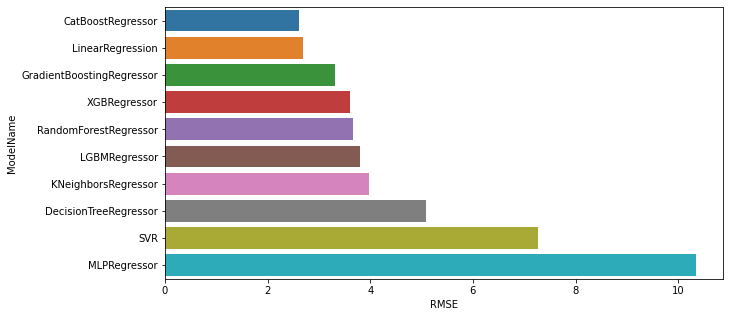

In [31]:
plt.figure(figsize=[10,5])
sns.barplot(x='RMSE',y='ModelName',data=model_visual.sort_values('RMSE'));

## Normalising the Data

In [33]:
X=df.drop('CDI', axis=1)
y=df['CDI']

In [34]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=['City Product','Infrastructure','Waste','Health','Education'])
X.head()

,City Product,Infrastructure,Waste,Health,Education
0,-0.486458,-1.933768,-0.468143,1.179385,-1.516117
1,-0.970204,-0.759414,-1.384951,1.138800,-0.547742
2,-1.306138,-1.900571,-1.384951,1.050863,-1.017107
3,-1.467387,-2.215945,-1.381789,0.881756,-1.792796
4,-1.198639,-2.170299,0.132524,0.719412,-1.743389


In [35]:
RMSE = []
ModelName = []

def ML(Algorithm):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model = Algorithm().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    ModelName.append(Algorithm.__name__)
    print(Algorithm.__name__,'RMSE score:',rmse)

In [36]:
for i in models:
    ML(i)

LinearRegression RMSE score: 2.684982919086566


C:\Users\Ferid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor RMSE score: 55.310526180354735
DecisionTreeRegressor RMSE score: 5.358963038544383
KNeighborsRegressor RMSE score: 3.03832489734363
RandomForestRegressor RMSE score: 3.4732492646721203
GradientBoostingRegressor RMSE score: 3.320937380552991


C:\Users\Ferid\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBRegressor RMSE score: 3.6072982315865945
LGBMRegressor RMSE score: 3.6245061542362103
Learning rate set to 0.02707
0:	learn: 17.7088797	total: 2.08ms	remaining: 2.08s
1:	learn: 17.4165482	total: 3.83ms	remaining: 1.91s
2:	learn: 17.1025560	total: 5.58ms	remaining: 1.85s
3:	learn: 16.8290247	total: 7.35ms	remaining: 1.83s
4:	learn: 16.5533345	total: 9.17ms	remaining: 1.82s
5:	learn: 16.2794337	total: 11.1ms	remaining: 1.83s
6:	learn: 15.9837943	total: 12.8ms	remaining: 1.81s
7:	learn: 15.7320063	total: 14.8ms	remaining: 1.83s
8:	learn: 15.4599632	total: 16.6ms	remaining: 1.82s
9:	learn: 15.2090118	total: 18.4ms	remaining: 1.82s
10:	learn: 14.9124433	total: 20.5ms	remaining: 1.85s
11:	learn: 14.6541563	total: 22.4ms	remaining: 1.85s
12:	learn: 14.3773752	total: 24.7ms	remaining: 1.88s
13:	learn: 14.1113938	total: 26.6ms	remaining: 1.87s
14:	learn: 13.8368593	total: 28.5ms	remaining: 1.87s
15:	learn: 13.5813530	total: 30.9ms	remaining: 1.9s
16:	learn: 13.3395850	total: 33.4ms	remaining

In [37]:
RMSE

[2.684982919086566,
 55.310526180354735,
 5.358963038544383,
 3.03832489734363,
 3.4732492646721203,
 3.320937380552991,
 3.6072982315865945,
 3.6245061542362103,
 2.61956867212181,
 7.99543347130143]

In [38]:
model_visual=pd.DataFrame({'ModelName':ModelName,'RMSE':RMSE})

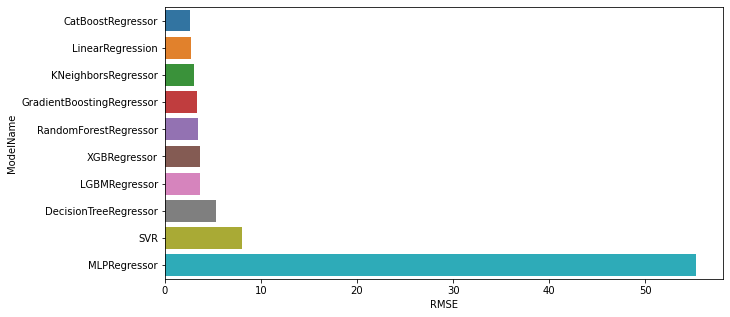

In [39]:
plt.figure(figsize=[10,5])
sns.barplot(x='RMSE',y='ModelName',data=model_visual.sort_values('RMSE'));